In [720]:
import numpy as np
import pandas as pd

import json
import csv

import datetime
import matplotlib.pyplot as plt

from statsmodels.regression.linear_model import RegressionResults
import pytz
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [692]:
filenames = ['ECE219_tweet_data/tweets_#gohawks.txt',
            'ECE219_tweet_data/tweets_#gopatriots.txt',
            'ECE219_tweet_data/tweets_#nfl.txt',
            'ECE219_tweet_data/tweets_#patriots.txt',
            'ECE219_tweet_data/tweets_#sb49.txt',
            'ECE219_tweet_data/tweets_#superbowl.txt'
            ]

output_filenames = ['Q1_2#gohawks.lol',
                    'Q1_2#gopatriots.lol',
                   'Q1_2#nfl.lol',
                   'Q1_2#patriots.lol',
                   'Q1_2#sb49.lol',
                   'Q1_2#superbowl.lol']

for i in range(len(filenames)):
    pst_tz = pytz.timezone('US/Pacific')
    
    with open(filenames[i], 'r') as reader:
        headers = [
                   'citation_date_raw',
                   'author_nick_names',
                   'tweets',
                   'retweets',
                   'followers',
                   'followers_max'
                  ]
        with open(output_filenames[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                data = json.loads(line)
                response =  [
                            data['citation_date'],
                            data['author']['nick'],
                            1, # there is one tweet at a time..
                            data['metrics']['citations']['total'], #retweets
                            data['author']['followers'], #followers
                            data['author']['followers'], #followers
                             ]
                csv_writer.writerow(response)


In [772]:
def parse_date_pst(df):
    utc_tz = pytz.UTC
    pst_tz = pytz.timezone('America/Los_Angeles')
    df['citation_date'] = pd.to_datetime(df['citation_date_raw'], unit='s')
    df['citation_date_pst'] = pd.to_datetime(df['citation_date_raw'], unit='s').apply(lambda x: x.tz_localize(utc_tz).astimezone(pst_tz))
    df['date'] = df['citation_date_pst'].apply(lambda x: x.strftime('%Y%m%d'))
    df['hour'] = df['citation_date_pst'].apply(lambda x: x.hour)
    
    
def get_basic_statistics(dataframe):
    max = dataframe.max()
    min = dataframe.min()
    avg_tweets_per_hour = dataframe['tweets'].sum() / ((max['citation_date_pst'] - min['citation_date_pst']).total_seconds() / 60 / 60)
    print('Average tweets per hour:',avg_tweets_per_hour)
    
    avg_followers_posting_tweets = dataframe['followers'].sum() / dataframe['tweets'].sum()
    print('Average number of users posting tweets per tweet:', avg_followers_posting_tweets)
    
    avg_retweet_per_tweet = dataframe['retweets'].sum() / dataframe['tweets'].sum()
    print('Average number of retweet per tweet:', avg_followers_per_tweet)
    
       
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())    
    
    
    
    
    

In [773]:
# QUESTION 1: Report the following statistics for each hashtag:
#  Average number of tweets per hour
#  Average number of followers of users posting the tweets per tweet (to make it simple, we
# average over the number of tweets; if a users posted twice, we count the user and the user's
# followers twice as well)
#  Average number of retweets per tweet

In [774]:
gohawks = pd.read_csv('Q1_2#gohawks.lol',delimiter=',')
gopatriots = pd.read_csv('Q1_2#gopatriots.lol',delimiter=',')
nfl = pd.read_csv('Q1_2#nfl.lol',delimiter=',')
patriots = pd.read_csv('Q1_2#patriots.lol',delimiter=',')
sb49 = pd.read_csv('Q1_2#sb49.lol',delimiter=',')
superbowl = pd.read_csv('Q1_2#superbowl.lol',delimiter=',')

In [777]:
# parse date for use down below.

parse_date_pst(gohawks)
parse_date_pst(gopatriots)
parse_date_pst(nfl)
parse_date_pst(patriots)
parse_date_pst(sb49)
parse_date_pst(superbowl)

In [778]:
full_df = pd.concat([gohawks, gopatriots, nfl, patriots, sb49, superbowl])

In [779]:
full_df.head()

,citation_date_raw,author_nick_names,tweets,retweets,followers,followers_max,citation_date,citation_date_pst,date,hour
0,1421518778,rejinseattle,1,5,1752.0,1752.0,2015-01-17 18:19:38,2015-01-17 10:19:38-08:00,20150117,10
1,1421259536,emq4444,1,2,258.0,258.0,2015-01-14 18:18:56,2015-01-14 10:18:56-08:00,20150114,10
2,1421468519,beccadelgado67,1,5,22.0,22.0,2015-01-17 04:21:59,2015-01-16 20:21:59-08:00,20150116,20
3,1421468497,beccadelgado67,1,2,22.0,22.0,2015-01-17 04:21:37,2015-01-16 20:21:37-08:00,20150116,20
4,1421468336,beccadelgado67,1,2,22.0,22.0,2015-01-17 04:18:56,2015-01-16 20:18:56-08:00,20150116,20


In [780]:
# go hawks
print('GoHawks')
get_basic_statistics(gohawks)

GoHawks
Average tweets per hour: 292.4878506217368
Average number of users posting tweets per tweet: 2217.9237355281984
Average number of retweet per tweet: 2.2309229822313545


In [781]:
#go patriots
print('GoPatriots')
get_basic_statistics(gopatriots)

GoPatriots
Average tweets per hour: 40.95469800606194
Average number of users posting tweets per tweet: 1427.2526051635405
Average number of retweet per tweet: 2.2309229822313545


In [782]:
print('NFL')
get_basic_statistics(nfl)

NFL
Average tweets per hour: 397.0213901819841
Average number of users posting tweets per tweet: 4662.37544523693
Average number of retweet per tweet: 2.2309229822313545


In [783]:
print('Patriots')
get_basic_statistics(patriots)

Patriots
Average tweets per hour: 750.89426460689
Average number of users posting tweets per tweet: 3280.4635616550277
Average number of retweet per tweet: 2.2309229822313545


In [784]:
print('Sb49')
get_basic_statistics(sb49)

Sb49
Average tweets per hour: 1276.857059868047
Average number of users posting tweets per tweet: 10374.160292019487
Average number of retweet per tweet: 2.2309229822313545


In [785]:
print('Superbowl')
get_basic_statistics(superbowl)

Superbowl
Average tweets per hour: 2072.1184017040796
Average number of users posting tweets per tweet: 8814.96799424623
Average number of retweet per tweet: 2.2309229822313545


In [786]:
# QUESTION 2: Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram
# with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named
# as tweet [#hashtag].txt.

In [787]:
max = nfl.max()
min = nfl.min()

In [788]:
nfl['time_hour'] = nfl['citation_date_pst'].apply(lambda x: round((x - min['citation_date_pst']).total_seconds()/60/60))

In [789]:
superbowl['time_hour'] = superbowl['citation_date_pst'].apply(lambda x: round((x - min['citation_date_pst']).total_seconds()/60/60))

In [790]:
nfl.head()

,citation_date_raw,author_nick_names,tweets,retweets,followers,followers_max,citation_date,citation_date_pst,date,hour,time_hour
0,1421517546,ibrake4flowers,1,4,41.0,41.0,2015-01-17 17:59:06,2015-01-17 09:59:06-08:00,20150117,9,82
1,1421258906,tmswithmro,1,2,361.0,361.0,2015-01-14 18:08:26,2015-01-14 10:08:26-08:00,20150114,10,10
2,1421518663,rainbowkirk,1,2,6.0,6.0,2015-01-17 18:17:43,2015-01-17 10:17:43-08:00,20150117,10,82
3,1421380685,gary4freedom,1,2,1364.0,1364.0,2015-01-16 03:58:05,2015-01-15 19:58:05-08:00,20150115,19,44
4,1421257471,eddieedmundo,1,14,580.0,580.0,2015-01-14 17:44:31,2015-01-14 09:44:31-08:00,20150114,9,10


In [791]:
superbowl.head()

,citation_date_raw,author_nick_names,tweets,retweets,followers,followers_max,citation_date,citation_date_pst,date,hour,time_hour
0,1421468497,beccadelgado67,1,2,22.0,22.0,2015-01-17 04:21:37,2015-01-16 20:21:37-08:00,20150116,20,68
1,1421467579,beccadelgado67,1,15,22.0,22.0,2015-01-17 04:06:19,2015-01-16 20:06:19-08:00,20150116,20,68
2,1421266957,waltskelliepic,1,2,858.0,858.0,2015-01-14 20:22:37,2015-01-14 12:22:37-08:00,20150114,12,12
3,1421261298,eventmarketer,1,2,14335.0,14335.0,2015-01-14 18:48:18,2015-01-14 10:48:18-08:00,20150114,10,11
4,1421316031,cqr111,1,7,1143.0,1143.0,2015-01-15 10:00:31,2015-01-15 02:00:31-08:00,20150115,2,26


In [792]:
nfl_time_hour = nfl.groupby('time_hour').sum()

In [793]:
x = list(nfl_time_hour.index)
y = list(nfl_time_hour.tweets)

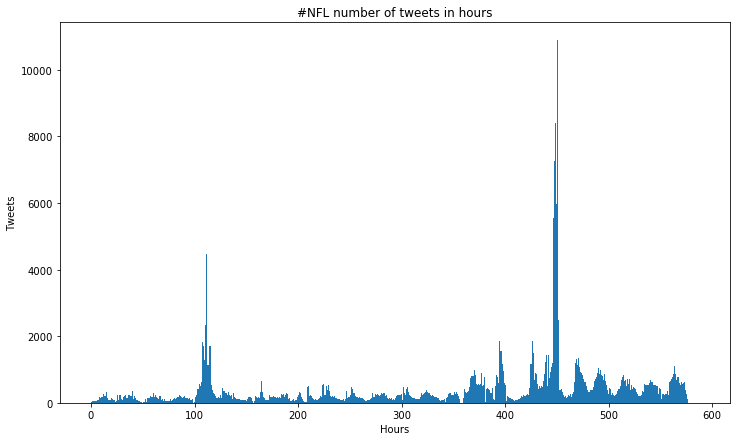

In [794]:
plt.figure(figsize=(12,7))
plt.bar(x, y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#NFL number of tweets in hours')
plt.show()

In [795]:
superbowl_time_hour = superbowl.groupby('time_hour').sum()
superbowl_time_hour_x = list(superbowl_time_hour.index)
superbowl_time_hour_y = list(superbowl_time_hour.tweets)

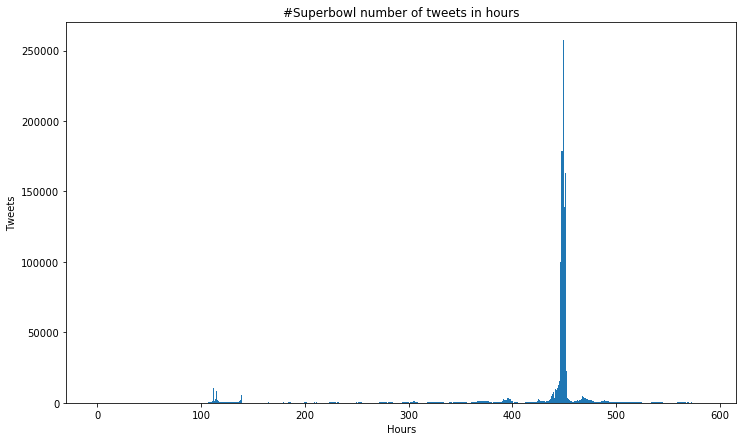

In [796]:
plt.figure(figsize=(12,7))
plt.bar(superbowl_time_hour_x, superbowl_time_hour_y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#Superbowl number of tweets in hours')
plt.show()

In [812]:
# QUESTION 3: For each of your models, report your model's Mean Squared Error (MSE) and
# R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You
# may use the OLS in the libarary statsmodels in Python.

# http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

In [821]:
def train_ols(df):
    print('=============================Top 5 items======================================')
    print(df.head())
    df_agg = df.groupby(['date','hour']).agg(
    {'hour' : np.max,
     'tweets' : np.sum,
     'retweets' : np.sum,
     'followers' : np.sum,
     'followers_max': np.max
    })
    print('==============================Aggregated items=================================')
    print(df_agg.head())
    
    #train ols here
    model = ols("tweets ~ retweets + followers + followers_max", data=df_agg).fit()
    print(model.summary())
    
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    plt.show()
    
    return model


=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421518778      rejinseattle       1         5     1752.0   
1         1421259536           emq4444       1         2      258.0   
2         1421468519    beccadelgado67       1         5       22.0   
3         1421468497    beccadelgado67       1         2       22.0   
4         1421468336    beccadelgado67       1         2       22.0   

   followers_max       citation_date         citation_date_pst      date  hour  
0         1752.0 2015-01-17 18:19:38 2015-01-17 10:19:38-08:00  20150117    10  
1          258.0 2015-01-14 18:18:56 2015-01-14 10:18:56-08:00  20150114    10  
2           22.0 2015-01-17 04:21:59 2015-01-16 20:21:59-08:00  20150116    20  
3           22.0 2015-01-17 04:21:37 2015-01-16 20:21:37-08:00  20150116    20  
4           22.0 2015-01-17 04:18:56 2015-01-16 20:18:56-08:00  20150116    20  
========

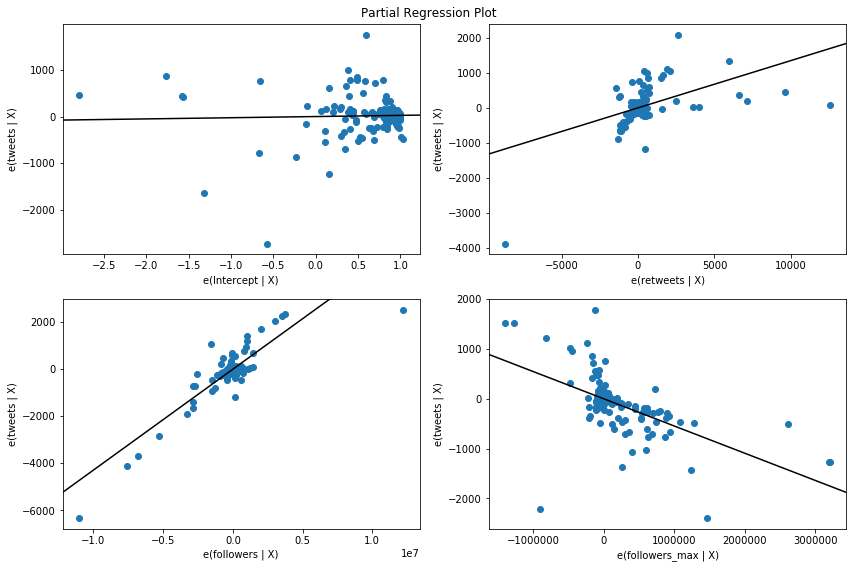

In [822]:
gohawks_model = train_ols(gohawks)

=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421257541      patsnation87       1         6     2895.0   
1         1421275471          thetrumd       1         4      158.0   
2         1421341875      ricciardelli       1         3    20896.0   
3         1421285189    soccer44life10       1         3      500.0   
4         1421427332   devaughncaswell       1         2      491.0   

   followers_max       citation_date         citation_date_pst      date  hour  
0         2895.0 2015-01-14 17:45:41 2015-01-14 09:45:41-08:00  20150114     9  
1          158.0 2015-01-14 22:44:31 2015-01-14 14:44:31-08:00  20150114    14  
2        20896.0 2015-01-15 17:11:15 2015-01-15 09:11:15-08:00  20150115     9  
3          500.0 2015-01-15 01:26:29 2015-01-14 17:26:29-08:00  20150114    17  
4          491.0 2015-01-16 16:55:32 2015-01-16 08:55:32-08:00  20150116     8  
========

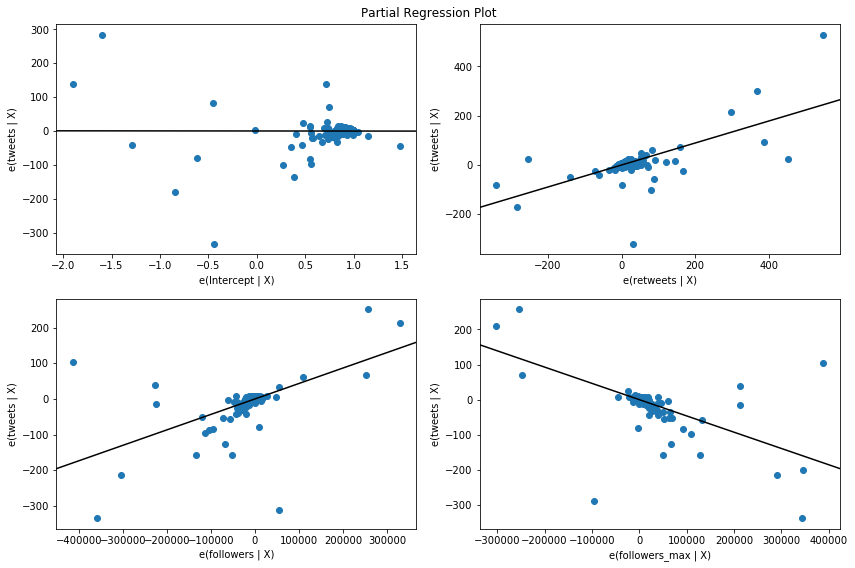

In [823]:
gopatriots_model = train_ols(gopatriots)

=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421517546    ibrake4flowers       1         4       41.0   
1         1421258906        tmswithmro       1         2      361.0   
2         1421518663       rainbowkirk       1         2        6.0   
3         1421380685      gary4freedom       1         2     1364.0   
4         1421257471      eddieedmundo       1        14      580.0   

   followers_max       citation_date         citation_date_pst      date  \
0           41.0 2015-01-17 17:59:06 2015-01-17 09:59:06-08:00  20150117   
1          361.0 2015-01-14 18:08:26 2015-01-14 10:08:26-08:00  20150114   
2            6.0 2015-01-17 18:17:43 2015-01-17 10:17:43-08:00  20150117   
3         1364.0 2015-01-16 03:58:05 2015-01-15 19:58:05-08:00  20150115   
4          580.0 2015-01-14 17:44:31 2015-01-14 09:44:31-08:00  20150114   

   hour  time_hour  
0     9         

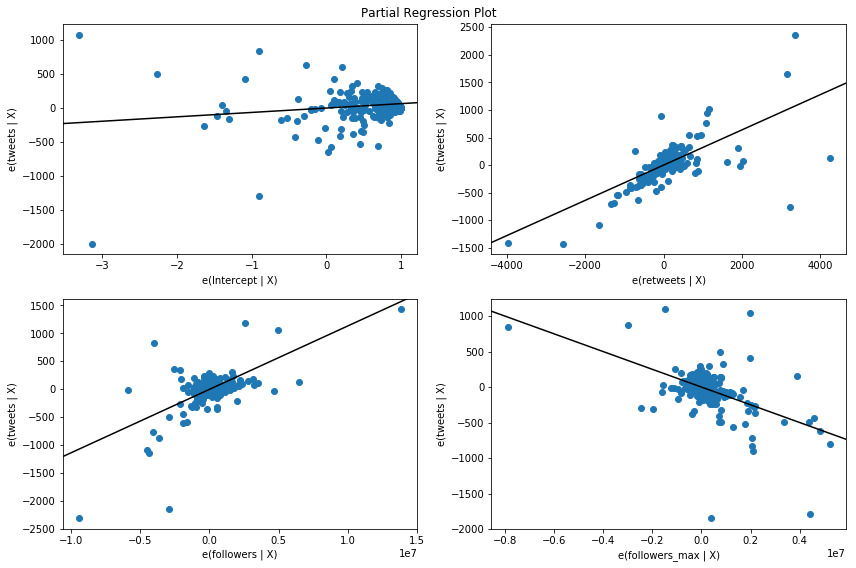

In [824]:
nfl_model = train_ols(nfl)

=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421249004      gingerlanier       1         6     2367.0   
1         1421373971        jonatricks       1       128      116.0   
2         1421517546    ibrake4flowers       1         4       41.0   
3         1421455427           d_rob19       1         2      216.0   
4         1421332884         dulaney_l       1         3     1532.0   

   followers_max       citation_date         citation_date_pst      date  hour  
0         2367.0 2015-01-14 15:23:24 2015-01-14 07:23:24-08:00  20150114     7  
1          116.0 2015-01-16 02:06:11 2015-01-15 18:06:11-08:00  20150115    18  
2           41.0 2015-01-17 17:59:06 2015-01-17 09:59:06-08:00  20150117     9  
3          216.0 2015-01-17 00:43:47 2015-01-16 16:43:47-08:00  20150116    16  
4         1532.0 2015-01-15 14:41:24 2015-01-15 06:41:24-08:00  20150115     6  
========

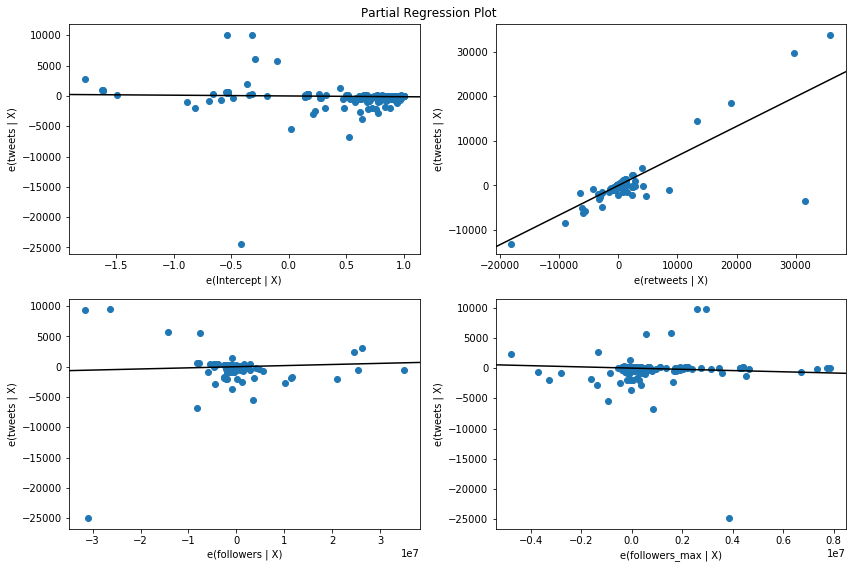

In [825]:
patriots_model = train_ols(patriots)

=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421238675         kojirises       1         2       59.0   
1         1421244058     thewarrioratl       1         1       21.0   
2         1421246898      adamjcharles       1         1       53.0   
3         1421249217    skylerxschrein       1         2      533.0   
4         1421249288   dealornodeal_23       1         1      260.0   

   followers_max       citation_date         citation_date_pst      date  hour  
0           59.0 2015-01-14 12:31:15 2015-01-14 04:31:15-08:00  20150114     4  
1           21.0 2015-01-14 14:00:58 2015-01-14 06:00:58-08:00  20150114     6  
2           53.0 2015-01-14 14:48:18 2015-01-14 06:48:18-08:00  20150114     6  
3          533.0 2015-01-14 15:26:57 2015-01-14 07:26:57-08:00  20150114     7  
4          260.0 2015-01-14 15:28:08 2015-01-14 07:28:08-08:00  20150114     7  
========

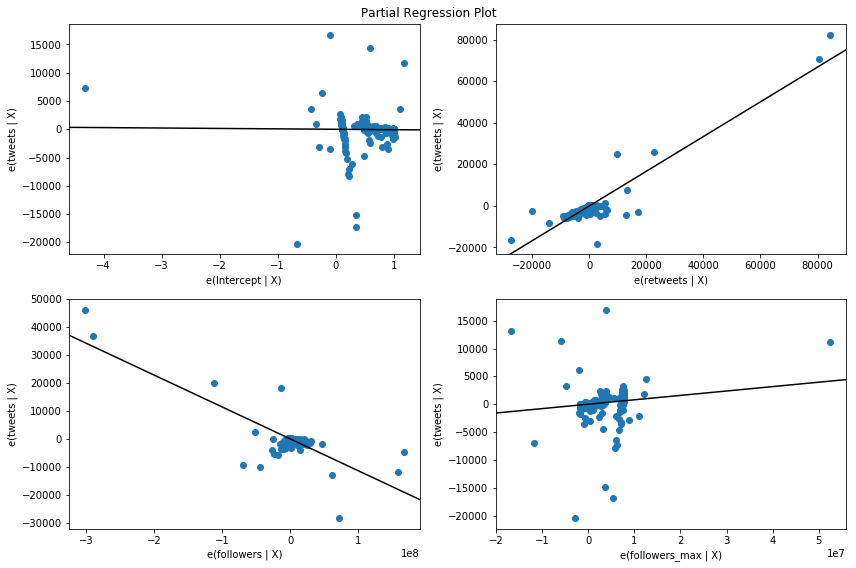

In [826]:
sb49_model = train_ols(sb49)

=============================Top 5 items======================================
   citation_date_raw author_nick_names  tweets  retweets  followers  \
0         1421468497    beccadelgado67       1         2       22.0   
1         1421467579    beccadelgado67       1        15       22.0   
2         1421266957    waltskelliepic       1         2      858.0   
3         1421261298     eventmarketer       1         2    14335.0   
4         1421316031            cqr111       1         7     1143.0   

   followers_max       citation_date         citation_date_pst      date  \
0           22.0 2015-01-17 04:21:37 2015-01-16 20:21:37-08:00  20150116   
1           22.0 2015-01-17 04:06:19 2015-01-16 20:06:19-08:00  20150116   
2          858.0 2015-01-14 20:22:37 2015-01-14 12:22:37-08:00  20150114   
3        14335.0 2015-01-14 18:48:18 2015-01-14 10:48:18-08:00  20150114   
4         1143.0 2015-01-15 10:00:31 2015-01-15 02:00:31-08:00  20150115   

   hour  time_hour  
0    20         

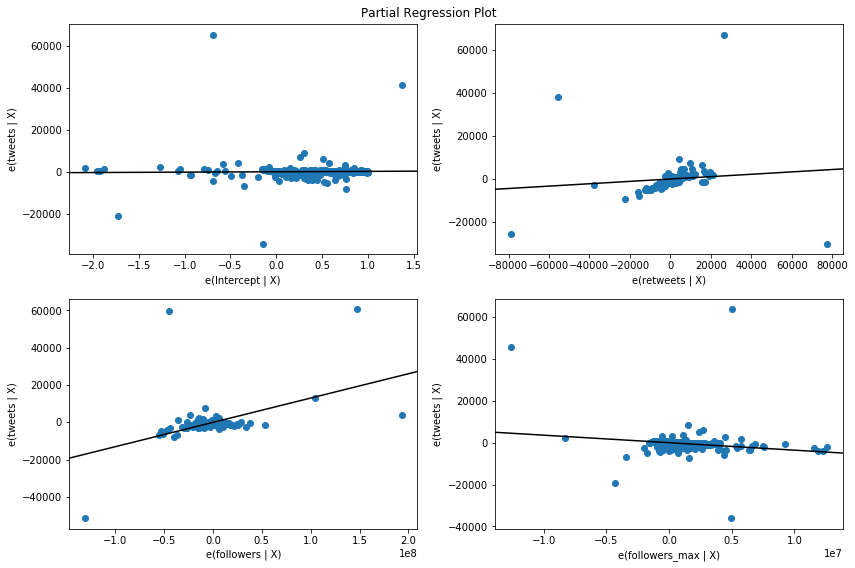

In [827]:
superbowl_model = train_ols(superbowl)

In [ ]:
# QUESTION 4: Design a regression model using any features from the papers you nd or other
# new features you may find useful for this problem. Fit your model on the data of each hashtag and
# report fitting MSE and significance of features.

In [ ]:
# QUESTION 5: For each of the top 3 features (i.e. with the smallest p-values) in your mea-
# surements, draw a scatter plot of predictant (number of tweets for next hour) versus value of that
# feature, using all the samples you have extracted, and analyze it.
# Do the regression coefficients agree with the trends in the plots? If not, why?

In [ ]:
# QUESTION 6: We define three time periods and their corresponding window length as follows:
# 1. Before Feb. 1, 8:00 a.m.: 1-hour window
# 2. Between Feb. 1, 8:00 a.m. and 8:00 p.m.: 5-minute window
# 3. After Feb. 1, 8:00 p.m.: 1-hour window
# For each hashtag, train 3 regression models, one for each of these time periods (the times are all in
# PST). Report the MSE and R-squared score for each case.

In [ ]:
# QUESTION 7: Also, aggregate the data of all hashtags, and train 3 models (for the intervals
# mentioned above) to predict the number of tweets in the next hour on the aggregated data.
# Perform the same evaluations on your combined model and compare with models you trained for
# individual hashtags.

In [ ]:
# QUESTION 8: Use grid search to nd the best parameter set for RandomForestRegressor and
# GradientBoostingRegressor respectively. Use the following param grid
# {
# 'max_depth': [10, 20, 40, 60, 80, 100, 200, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000,
# 1200, 1400, 1600, 1800, 2000]
# }
# Set cv = KFold(5, shuffle=True), scoring='neg mean squared error' for the grid search.
# Analyze the result of the grid search. Do the test errors from cross-validation look good? If not,
# please explain the reason.

In [ ]:
# QUESTION 9: Compare the best estimator you found in the grid search with OLS on the entire
# dataset.

In [ ]:
# QUESTION 10: For each time period described in Question 6, perform the same grid search
# above for GradientBoostingRegressor (with corresponding time window length). Does the cross-
# validation test error change? Are the best parameter set you nd in each period agree with those
# you found above?

In [ ]:
# QUESTION 11: Now try to regress the aggregated data with MLPRegressor. Try different
# architectures (i.e. the structure of the network) by adjusting hidden layer sizes. You should try
# at least 5 architectures with various numbers of layers and layer sizes. Report the architectures you
# tried, as well as its MSE of tting the entire aggregated data.

In [ ]:
# QUESTION 12: Use StandardScaler to scale the data before feeding it to MLPRegressor
# (with the best architecture you got above). Does its performance increase?

In [ ]:
# QUESTION 13: Using grid search, find the best architecture for each period (with corre-
# sponding window length) described in Question 6.

In [ ]:
# QUESTION 14: Report the model you use. For each test file, provide your predictions on the
# number of tweets in the next time window.
# Note: Test data should not be used as a source for training. You are not bounded to only linear
# models. You can find your best model through cross validation of your training data.

In [ ]:
# QUESTION 15:
# 1. Explain the method you use to determine whether the location is in Washington, Massachusetts
# or neither. Only use the tweets whose authors belong to either Washington or Massachusetts
# for the next part.
# 2. Train a binary classier to predict the location of the author of a tweet (Washington or
# Massachusetts), given only the textual content of the tweet (using the techniques you learnt
# in project 1). Try different classication algorithms (at least 3). For each, plot ROC curve,
# report confusion matrix, and calculate accuracy, recall and precision.

In [ ]:
# QUESTION 16: The dataset in hands is rich as there is a lot of metadata to each tweet. Be
# creative and propose a new problem (something interesting that can be inferred from this dataset)
# other than the previous parts. You can look into the literature of Twitter data analysis to get some
# ideas. Implement your idea and show that it works. As a suggestion, you might provide some
# analysis based on changes of tweet sentiments for fans of the opponent teams participating in the
# match. You get full credit for briniging in novelty and full or partial implementation of your new
# ideas.